In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.random import set_seed

from kaggle_prediction_interval_birthweight.workflow.validation import Validator

np.random.seed(1)
set_seed(1)

In [3]:
def plot_result(obs, lower, upper, lower_new, upper_new):
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].vlines(x=obs, ymin=lower, ymax=upper, alpha=0.25)
    ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="orange")
    ax[0].set_xlabel("observations")
    ax[0].set_ylabel("predictions")
    ax[1].hist(lower, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[1].hist(
        lower_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[1].set_xlabel("predicted lower bounds")
    ax[1].legend()
    ax[2].hist(upper, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[2].hist(
        upper_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[2].set_xlabel("predicted upper bounds")
    ax[2].legend()
    plt.show()

In [4]:
data = pd.read_csv("../data/train.csv")
data_test = pd.read_csv("../data/test.csv")

Validation on fold 1 of 2 begins.
Validation on fold 2 of 2 begins.
NOIS is 1863.2 and coverage is 91.3%.


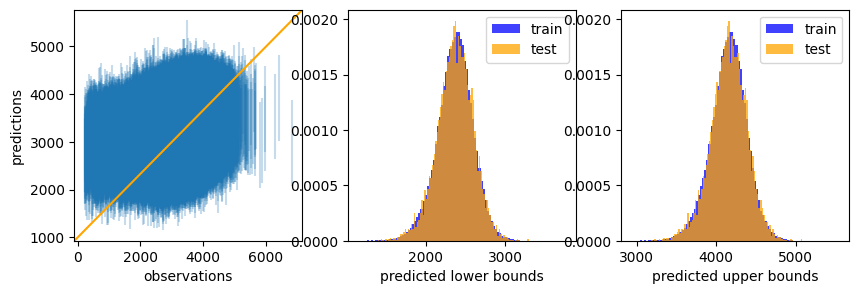

In [10]:
rr_validator = Validator("RidgeRegressor")
rr_validator.fit(data)
rr_validator.print_performance_summary()

lower, upper = rr_validator.predict_intervals(data)
lower_new, upper_new = rr_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

In [37]:
buffer = -0.01
upper_limit = alpha + ((1 - alpha) / 2) - buffer
lower_limit = (1 - alpha) / 2 - buffer

print(upper_limit)
print(lower_limit)
print(upper_limit - lower_limit)

0.96
0.05999999999999999
0.9


1/1 [==============================] - 0s 7ms/step


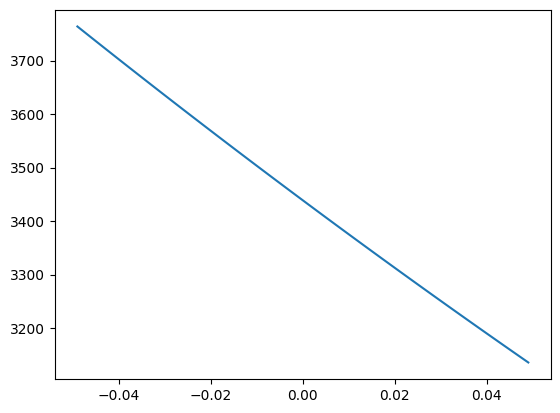

In [46]:
import scipy.stats as st

alpha = 0.9

center, spread, skew, tail = (
    nn_validator.models[0].model.predict(np.random.randn(1, 82)).T
)
spread = spread + 1e-3
tail = tail + 1e-3

buffers = np.linspace(-0.049, 0.049, 100)
widths = []
for buffer in buffers:
    lower = center + (tail * spread) * np.sinh(
        (1 / tail) * np.arcsinh(st.norm.ppf((1 - alpha) / 2) - buffer) + skew / tail
    )
    upper = center + (tail * spread) * np.sinh(
        (1 / tail) * np.arcsinh(st.norm.ppf(alpha + (1 - alpha) / 2) - buffer)
        + skew / tail
    )
    widths.append(upper - lower)

plt.plot(buffers, widths)
plt.show()

Validation on fold 1 of 2 begins.
1687/1687 [==============================] - 1s 530us/step
Validation on fold 2 of 2 begins.
1691/1691 [==============================] - 1s 531us/step
NOIS is 1760.7 and coverage is 90.6%.
178/178 [==============================] - 0s 539us/step


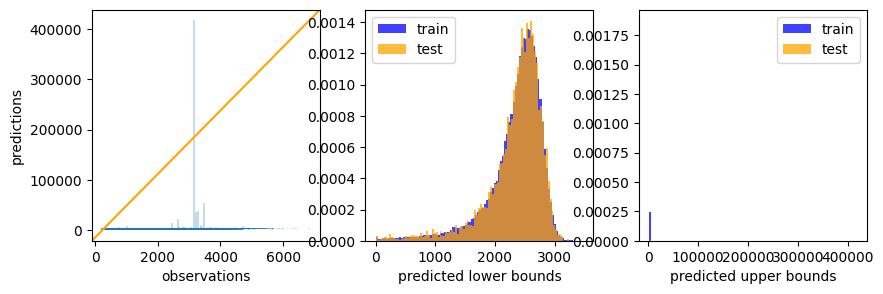

In [40]:
nn_validator = Validator("MissingnessNeuralNet", units_list=[100], bayesian=False)
nn_validator.fit(data)
nn_validator.print_performance_summary()

lower, upper = nn_validator.predict_intervals(data)
lower_new, upper_new = nn_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

In [ ]:
hbr_validator = Validator("HistBoostRegressor")
hbr_validator.fit(data)
hbr_validator.print_performance_summary()

lower, upper = hbr_validator.predict_intervals(data)
lower_new, upper_new = hbr_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

In [ ]:
ens_validator = Validator("Ensembler")
ens_validator.fit(data)
ens_validator.print_performance_summary()

lower, upper = ens_validator.predict_intervals(data)
lower_new, upper_new = ens_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

In [ ]:
rr_lower, rr_upper = rr_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=rr_lower, pi_upper=rr_upper).to_csv(
    "../data/submission_rr.csv",
    index=False,
)

hbr_lower, hbr_upper = hbr_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=hbr_lower, pi_upper=hbr_upper).to_csv(
    "../data/submission_hbr.csv",
    index=False,
)

nn_lower, nn_upper = nn_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=nn_lower, pi_upper=nn_upper).to_csv(
    "../data/submission_nn.csv",
    index=False,
)

ens_lower, ens_upper = ens_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=ens_lower, pi_upper=ens_upper).to_csv(
    "../data/submission_ens.csv",
    index=False,
)